# Thailand CO2 Emission [1987-2022]
---

<img src="https://github.com/Kodchalerk/EDA-Thailand-CO2-Emission/blob/main/pic/thco2.png?raw=True" alt="Drawing" style="width: 700px;"/>


## About Dataset
---


Thailand CO2 Emission dataset provides a comprehensive monthly breakdown of carbon dioxide (CO2) emissions for the country over the course of 36 years, includes information on emission sources (Industry, Transportation and others) and fuel types (Oil, Natural gas and coal), allowing for a detailed analysis of the country's carbon footprint.

The data provided by the Thailand Energy Policy and Planning Office (EPPO) were in multiple Excel files which later merged and cleaned by my python script, making it more accessible in the appropriate format.

***The aim of this project is to answers the following questions:***


Link to dataset: https://www.kaggle.com/datasets/thaweewatboy/thailand-carbon-emission-statistics

- What is the trend of CO2 emissions in Thailand?
- Which month in a year has the highest CO2 emission on average?
- What fuel type causes the most CO2 emission on that specific month and overall?


### Trend of CO2 Emission in Thailand

<img src="https://github.com/Kodchalerk/EDA-Thailand-CO2-Emission/blob/main/pic/co.png?raw=True" alt="Drawing" style="width: 1000px;"/>



### Trend of CO2 Emission in Thailand caused by each fuel type
.
<img src="https://github.com/Kodchalerk/EDA-Thailand-CO2-Emission/blob/main/pic/co1.png?raw=True" alt="Drawing" style="width: 1000px;"/>



# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
df = pd.read_csv('https://github.com/Kodchalerk/EDA-Thailand-CO2-Emission/blob/main/co2.csv?raw=True')
df

,year,month,source,fuel_type,emissions_tons
0,1987,1,transport,oil,1588.61
1,1987,2,transport,oil,1428.29
2,1987,3,transport,oil,1581.16
3,1987,4,transport,oil,1557.40
4,1987,5,transport,oil,1513.35
...,...,...,...,...,...
2419,2022,8,industry,natural_gas,1764.82
2420,2022,9,industry,natural_gas,1679.07
2421,2022,10,industry,natural_gas,1612.04
2422,2022,11,industry,natural_gas,1539.67


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            2424 non-null   int64  
 1   month           2424 non-null   int64  
 2   source          2424 non-null   object 
 3   fuel_type       2424 non-null   object 
 4   emissions_tons  2424 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 94.8+ KB


In [4]:
# Check duplicated
df.duplicated().sum()

# No duplicates!

0

In [5]:
# Check null values
df.isnull().sum()

# No null values!

year              0
month             0
source            0
fuel_type         0
emissions_tons    0
dtype: int64

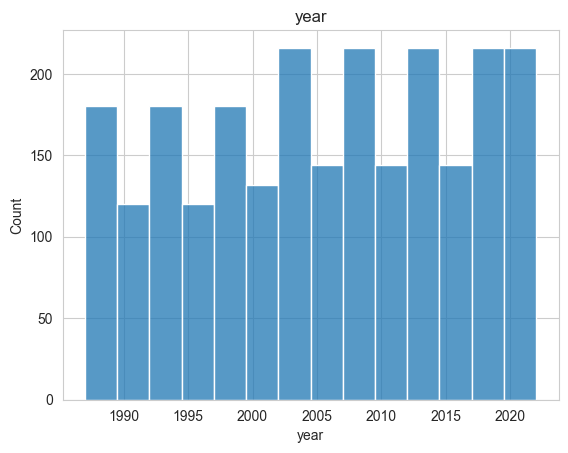

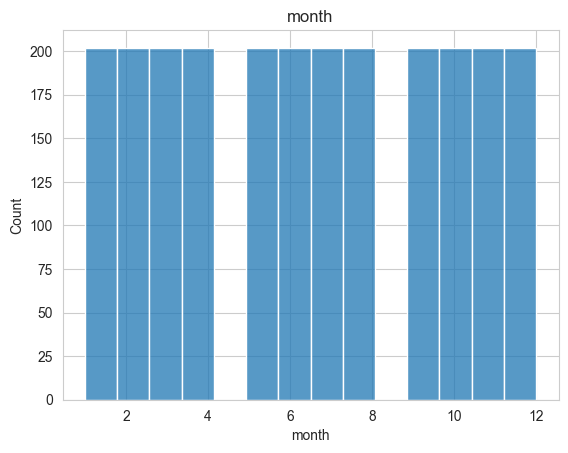

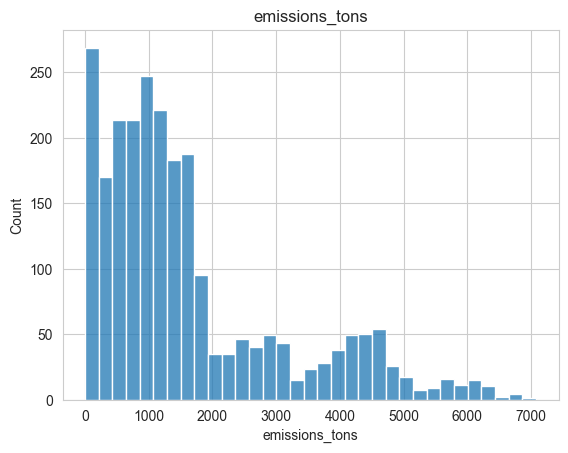

In [6]:
# Check numerical columns
numerical_col = df.select_dtypes(['int64','float64'])
for i in numerical_col:
    sns.histplot(data = df , x = i )
    plt.title(i)
    plt.show()
    
# Seems nothing wrong here    

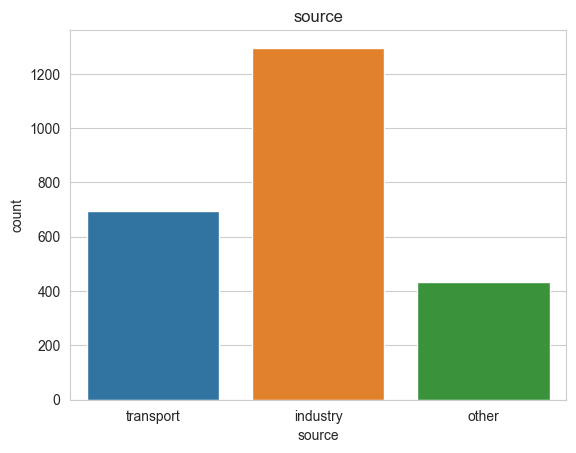

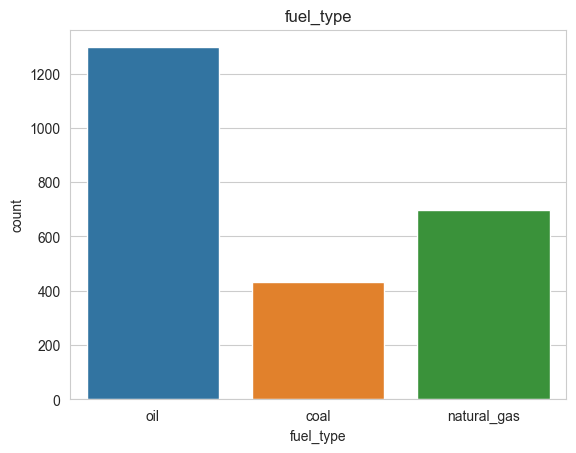

In [7]:
# Check for categorical columns
categorical_col = df.select_dtypes('object')
for i in categorical_col:
    sns.countplot(data = df , x= i)
    plt.title(i)
    plt.show()

# It seems there is nothing wrong here either.

In [8]:
# Data set is clean and there are no anomlalies in data
df1 = df.copy()

# Visualization

In [9]:
df1

,year,month,source,fuel_type,emissions_tons
0,1987,1,transport,oil,1588.61
1,1987,2,transport,oil,1428.29
2,1987,3,transport,oil,1581.16
3,1987,4,transport,oil,1557.40
4,1987,5,transport,oil,1513.35
...,...,...,...,...,...
2419,2022,8,industry,natural_gas,1764.82
2420,2022,9,industry,natural_gas,1679.07
2421,2022,10,industry,natural_gas,1612.04
2422,2022,11,industry,natural_gas,1539.67


In [10]:
df1['date'] = df1['year'].astype(str) + df1['month'].astype(str)
df1['date'] = pd.to_datetime(df1['date'], format='%Y%m')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2424 entries, 0 to 2423
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            2424 non-null   int64         
 1   month           2424 non-null   int64         
 2   source          2424 non-null   object        
 3   fuel_type       2424 non-null   object        
 4   emissions_tons  2424 non-null   float64       
 5   date            2424 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 113.8+ KB


Text(2018, 169516.3, 'In 2018, Thailand emitted CO2 in total 169516 tons')

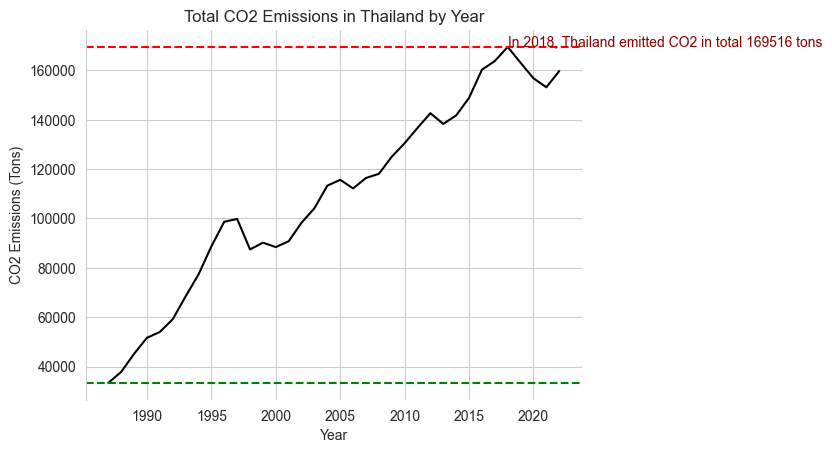

In [202]:
heat = df1[['year','emissions_tons']]
heat = heat.groupby('year').agg('sum').reset_index()
heat = heat.sort_values('year',ascending = False)
heat = heat.set_index('year')

sns.lineplot(data = heat , x = 'year' , y = 'emissions_tons' , color = 'black' )
sns.despine(bottom = True , right = True)
plt.title('Total CO2 Emissions in Thailand by Year')
plt.ylabel('CO2 Emissions (Tons)')
plt.xlabel('Year')
plt.axhline(y  = heat.emissions_tons.max() ,color="red", linestyle="--")
plt.axhline(y  = heat.emissions_tons.min() ,color="green", linestyle="--")
plt.text(x = 2018 ,y = heat.emissions_tons.max() ,s = 'In 2018, Thailand emitted CO2 in total {} tons'.format(round(heat.emissions_tons.max())) , fontdict = {'color' : 'darkred'})

,total_emissions
source,
industry,1559240.40
other,504736.58
transport,1875161.85


Text(3, 1704.7615841584159, 'Every year in March emitted CO2 on average 1705 tons')

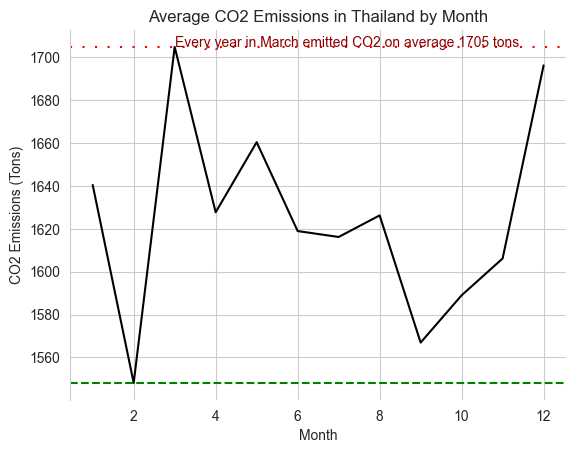

In [200]:
month = df1[['month','emissions_tons']]
month = month.groupby('month').agg('mean').reset_index()
month = month.sort_values('month',ascending = False)
month = month.set_index('month')

sns.lineplot(data = month , x = 'month' , y = 'emissions_tons' , color = 'black')
sns.despine(bottom = True , right = True)
plt.title('Average CO2 Emissions in Thailand by Month')
plt.ylabel('CO2 Emissions (Tons)')
plt.xlabel('Month')
plt.axhline(y  = month.emissions_tons.max() ,color="red", linestyle=(0 , (1,5)))
plt.axhline(y  = month.emissions_tons.min() ,color="green", linestyle="--")
plt.text(x = 3 , y = month.emissions_tons.max() ,s = 'Every year in March emitted CO2 on average {} tons'.format(round(month.emissions_tons.max())) , fontdict = {'color' : 'darkred'})

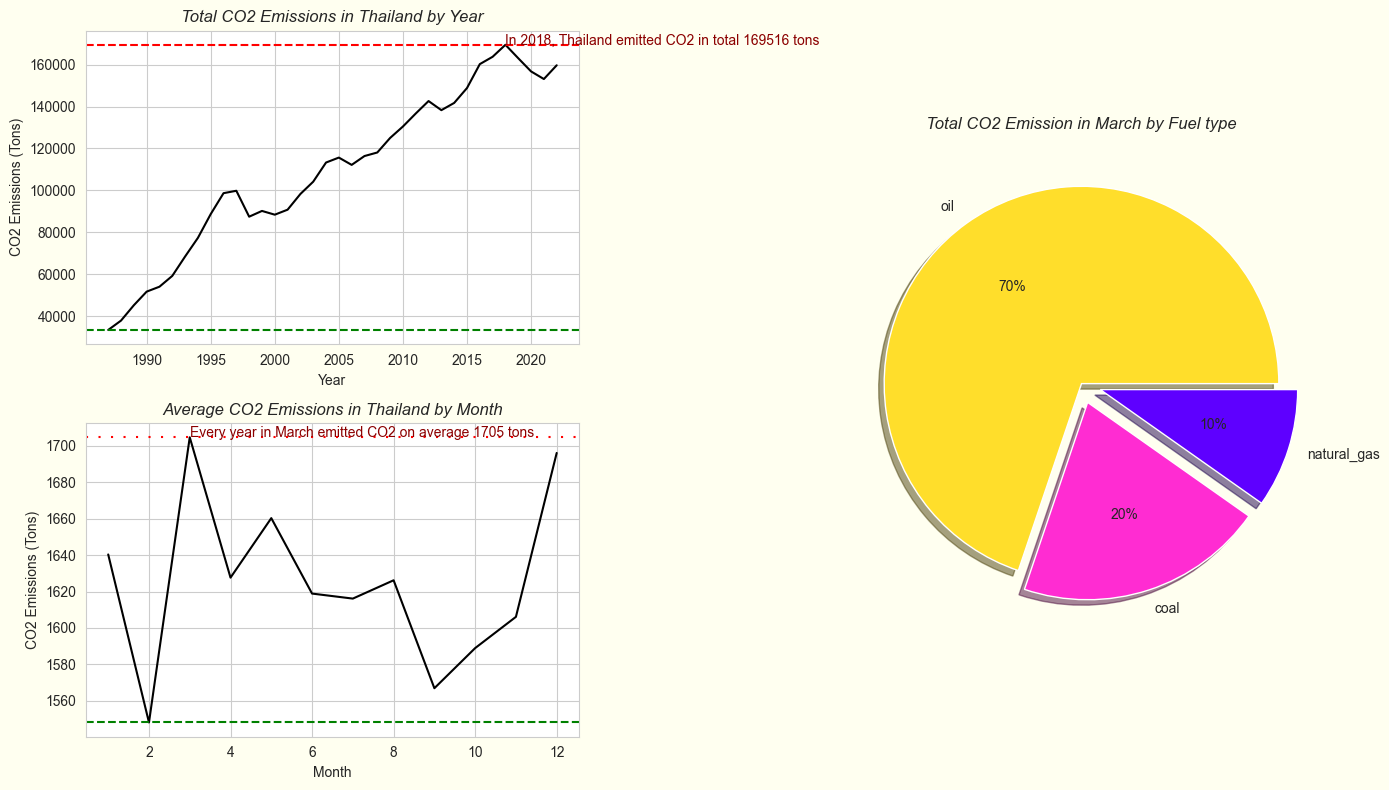

In [297]:
fig = plt.figure(figsize = (14,8) , facecolor = 'ivory')

#ax1
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.lineplot(data = heat , x = 'year' , y = 'emissions_tons' , color = 'black' )
# sns.despine(bottom = True , right = True)
ax1.set_title('Total CO2 Emissions in Thailand by Year' , style = 'italic')
ax1.set_ylabel('CO2 Emissions (Tons)')
ax1.set_xlabel('Year')
ax1.axhline(y  = heat.emissions_tons.max() ,color="red", linestyle="--")
ax1.axhline(y  = heat.emissions_tons.min() ,color="green", linestyle="--")
ax1.text(x = 2018 ,y = heat.emissions_tons.max() ,s = 'In 2018, Thailand emitted CO2 in total {} tons'.format(round(heat.emissions_tons.max())) , fontdict = {'color' : 'darkred'})

#ax2

ax2 = fig.add_subplot(2,2,3)
ax2 = sns.lineplot(data = month , x = 'month' , y = 'emissions_tons' , color = 'black')
# sns.despine(bottom = True , right = True)
ax2.set_title('Average CO2 Emissions in Thailand by Month' , style = 'italic')
ax2.set_ylabel('CO2 Emissions (Tons)')
ax2.set_xlabel('Month')
ax2.axhline(y  = month.emissions_tons.max() ,color="red", linestyle=(0 , (1,5)))
ax2.axhline(y  = month.emissions_tons.min() ,color="green", linestyle="--")
ax2.text(x = 3 , y = month.emissions_tons.max() ,s = 'Every year in March emitted CO2 on average {} tons'.format(round(month.emissions_tons.max())) , fontdict = {'color' : 'darkred'})

ax3 = fig.add_subplot(1,2,2)
df_march = df1[df1['month'] == 3]
df_march = df_march.groupby('fuel_type').agg(emissions = ('emissions_tons','sum'))
df_march = df_march.sort_values('emissions' , ascending = False)
ax3.set_title('Total CO2 Emission in March by Fuel type', style = 'italic')
ax3 = plt.pie(data = df_march , labels = df_march.index , x = 'emissions' ,colors = ['#ffde2b','#ff2cd2','#5e00ff'] , autopct = '%.0f%%' , shadow = True , explode = [0,0.1,0.1])


###
plt.tight_layout()
plt.savefig('co')

In [227]:
df_march.index

Index(['oil', 'coal', 'natural_gas'], dtype='object', name='fuel_type')

In [260]:
# # Take a deeper look at total co2 emissions by fuel type in March
# df_march = df1[df1['month'] == 3]
# df_march = df_march.groupby('fuel_type').agg(emissions = ('emissions_tons','sum'))
# df_march = df_march.sort_values('emissions' , ascending = False)

# plt.pie(data = df_march , labels = df_march.index , x = 'emissions' ,colors = ['#ff2cd2','#5e00ff','#ffde2b'] , autopct = '%.0f%%' , shadow = True , explode = [0,0.1,0.1])
# plt.title('Total CO2 Emissions in March by Fuel Type')

In [146]:
emis_type = df1.groupby(['year','fuel_type']).agg(total_emission = ('emissions_tons','sum')).reset_index()
emis = emis_type.groupby('fuel_type').agg(emission = ('total_emission','sum'))
emis

,emission
fuel_type,
coal,818683.87
natural_gas,394386.58
oil,2726068.38


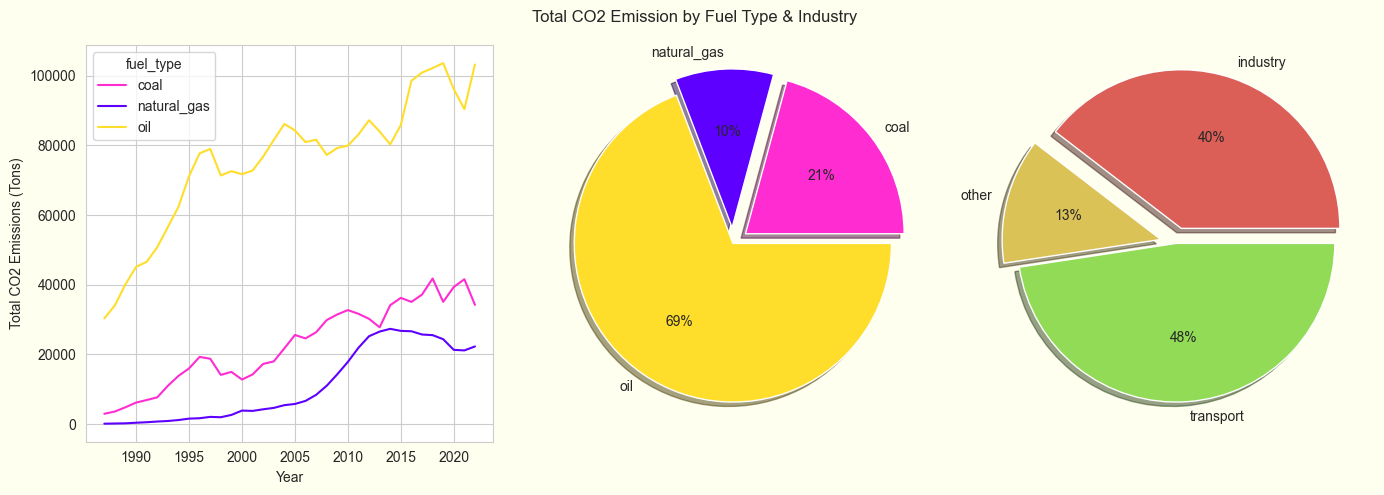

In [298]:
fig = plt.figure(figsize = (14,5) , facecolor = 'ivory')

#ax
sns.set_style('whitegrid')
plt.suptitle('Total CO2 Emission by Fuel Type & Industry')
ax = fig.add_subplot(1,3,1)
ax = sns.lineplot(data = emis_type , x = 'year' , y = 'total_emission' , hue = 'fuel_type' , palette = ['#ff2cd2','#5e00ff','#ffde2b'])

ax.set_ylabel('Total CO2 Emissions (Tons)')
ax.set_xlabel('Year')

#ax2
ax2 = fig.add_subplot(1,3,2)
ax2 = plt.pie(data = emis , labels = emis.index , x = 'emission' , autopct = '%.0f%%' , colors = ['#ff2cd2','#5e00ff','#ffde2b'] , shadow = True , explode = [0.1,0.1,0])

#ax3

ax3 = fig.add_subplot(1,3,3)
ind = df1.groupby('source').agg(total_emissions = ('emissions_tons','sum'))
ax3 = plt.pie(data = ind , labels = ind.index , x = 'total_emissions' , autopct = '%.0f%%' , colors = sns.color_palette("hls", 8) , shadow = True , explode = [0.1,0.1,0])


##
plt.tight_layout()
plt.savefig('co1')

In [290]:
asd = df1.groupby(['source','fuel_type'])
# for i,j in asd:
#     print(i)
#     print(j)
    
asd.groups.keys()

dict_keys([('industry', 'coal'), ('industry', 'natural_gas'), ('industry', 'oil'), ('other', 'oil'), ('transport', 'natural_gas'), ('transport', 'oil')])

In [293]:
asd.get_group(('industry','coal'))

,year,month,source,fuel_type,emissions_tons,date
1296,1987,1,industry,coal,190.50,1987-01-01
1297,1987,2,industry,coal,280.42,1987-02-01
1298,1987,3,industry,coal,143.21,1987-03-01
1299,1987,4,industry,coal,186.45,1987-04-01
1300,1987,5,industry,coal,273.05,1987-05-01
...,...,...,...,...,...,...
1723,2022,8,industry,coal,2777.48,2022-08-01
1724,2022,9,industry,coal,2636.28,2022-09-01
1725,2022,10,industry,coal,2642.42,2022-10-01
1726,2022,11,industry,coal,2505.56,2022-11-01
